>Note: My answers below are written in this text type

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [4]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Problem 1

# 1(a)



C:\Users\justi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\justi\anaconda3\lib\si

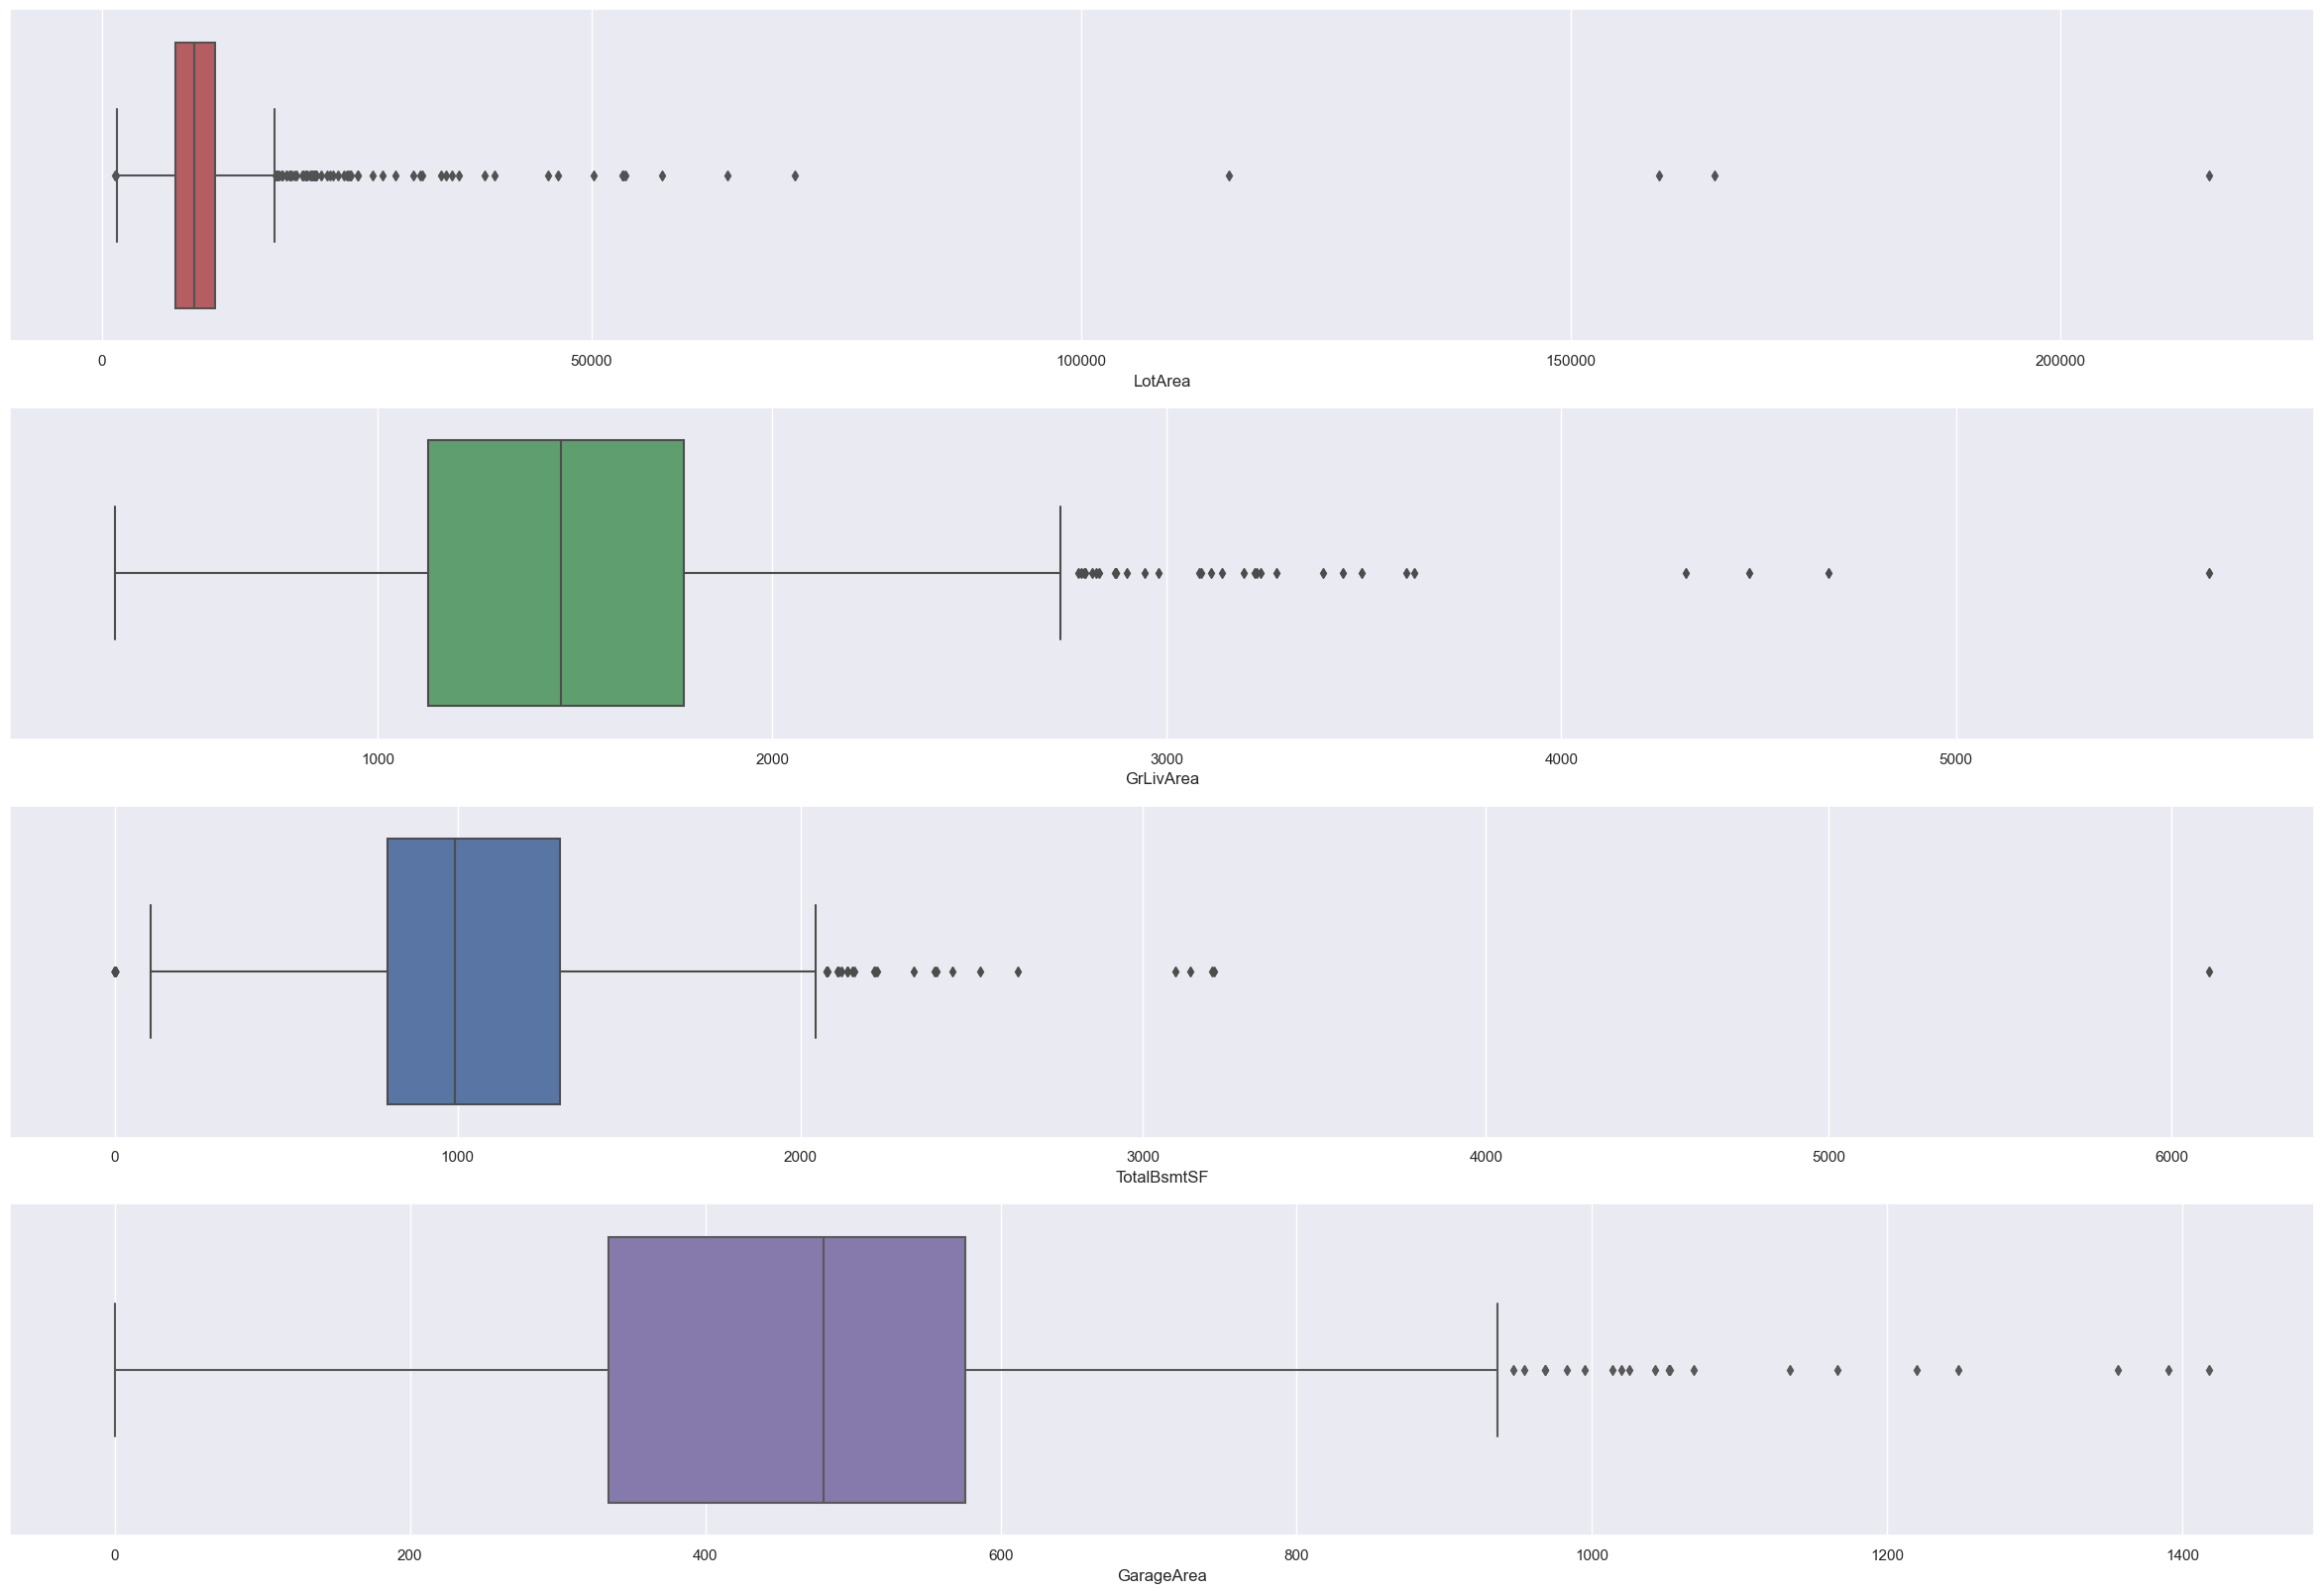

In [16]:
#Problem 1(a)
data1 = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']])

f, axes = plt.subplots(4,figsize=(30,20))
colors = ['r', 'g', 'b', 'm']    
count = 0
for var in data1:
    sb.boxplot(data1[var], orient = 'h', color = colors[count], ax = axes[count])
    count += 1
    

In [26]:
houseData['LotArea'].describe().round(2)

#Interquartile range is 4048

lowerbound = 7553.5-1.5*4048
upperbound = 11601.5+1.5*4048
print("Lowerbound whisker is ",lowerbound)
print("Upperbound whisker is ",upperbound)

print("Number of outliers for LotArea is: ", ((data1['LotArea'] < lowerbound) | (data1['LotArea'] > upperbound)).sum())


Lowerbound whisker is  1481.5
Upperbound whisker is  17673.5
Number of outliers for LotArea is:  69


>1(a) LotArea has the most number of outliers. There are 69 outliers for LotArea

# 1(b)

C:\Users\justi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\justi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\justi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

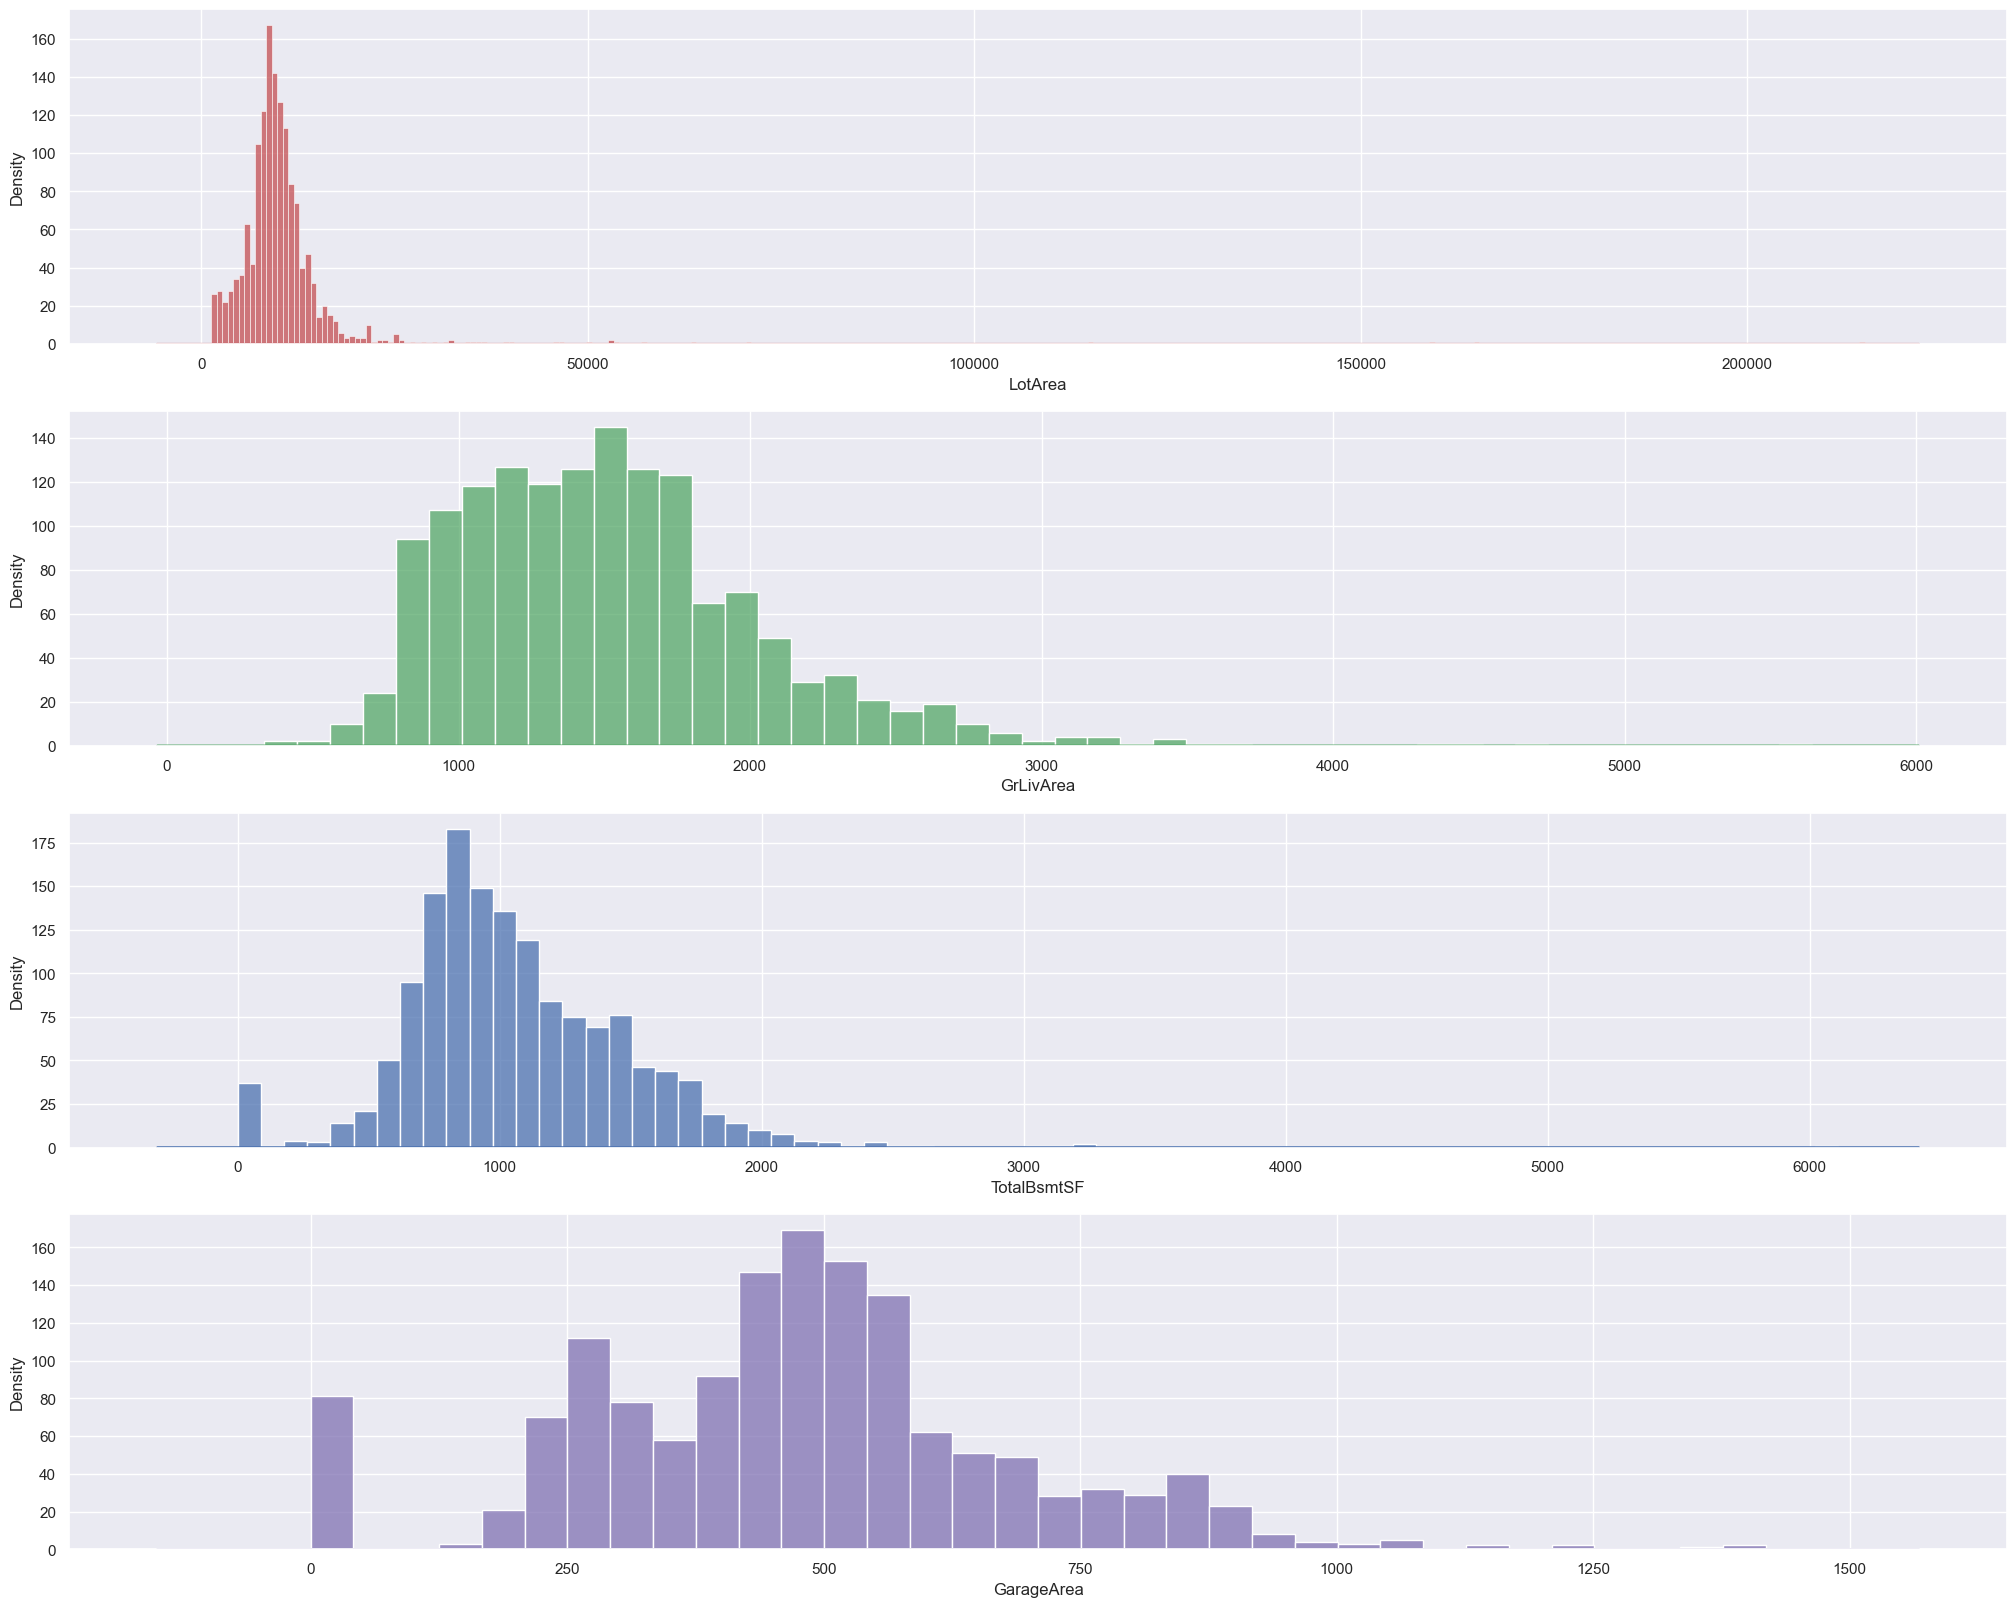

In [42]:
f, axes = plt.subplots(4,figsize=(25,20))
colors = ['r', 'g', 'b', 'm']
count = 0
for var in data1:
    sb.kdeplot(data1[var], color = colors[count], ax = axes[count]),
    sb.histplot(data1[var], color = colors[count], ax = axes[count])
    sb.distplot(data1[var], color = colors[count], ax = axes[count])
    count += 1

### A positive skew means that mean>median
### A negative skew means that mean<median

In [46]:
for var in data1:
    mean = data1[var].mean()
    median = data1[var].median()
    if mean-median>0: #positive skew
        print("Positive skewness of  ", var, " is ", mean-median)
    if mean-median<0: #negative skew
        print("Negative skewness of  ", var, " is ", mean-median)

Positive skewness of   LotArea  is  1038.3280821917815
Positive skewness of   GrLivArea  is  51.46369863013706
Positive skewness of   TotalBsmtSF  is  65.92945205479441
Negative skewness of   GarageArea  is  -7.019863013698625


> 1(b) LotArea is the most skewed from a normal regular distribution. The skew is a positive skew

# 1(c)

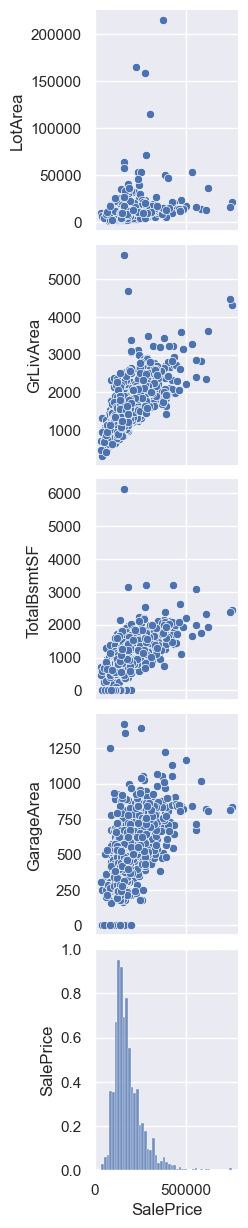

In [56]:
newdata = pd.DataFrame(houseData[["LotArea","GrLivArea","TotalBsmtSF","GarageArea","SalePrice"]])
sb.pairplot(data = newdata, x_vars=['SalePrice'])


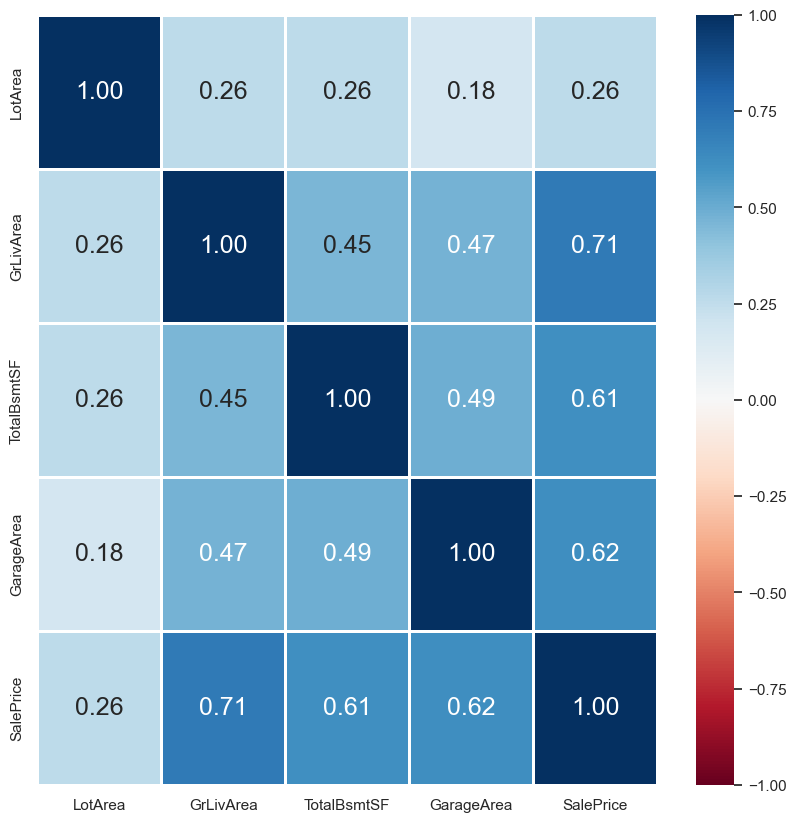

In [49]:
f = plt.figure(figsize=(10, 10))
sb.heatmap(newdata.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")
plt.show()

> 1(c)Using the pairplot and heatmap we can tell that GrLivArea and GarageArea has the strongest relationship with SalePrice and thus they are the top 2 variables

# Problem 2

# 2(a)

In [58]:
problemtwodata = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
problemtwodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   Neighborhood  1460 non-null   object
 2   BldgType      1460 non-null   object
 3   OverallQual   1460 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 45.8+ KB


In [132]:
print("Number of Types for MSSubClass :", len(problemtwodata["MSSubClass"].unique()))
print("Number of Types for Neighborhood :", len(problemtwodata["Neighborhood"].unique()))
print("Number of Types for BldgType :", len(problemtwodata["BldgType"].unique()))
print("Number of Types for OverallQual :", len(problemtwodata["OverallQual"].unique()))


Number of Types for MSSubClass : 15
Number of Types for Neighborhood : 25
Number of Types for BldgType : 5
Number of Types for OverallQual : 10


>2(a) Neighborhood has the highest number of levels of 25.

# 2(b)

<AxesSubplot:xlabel='SalePrice', ylabel='MSSubClass'>

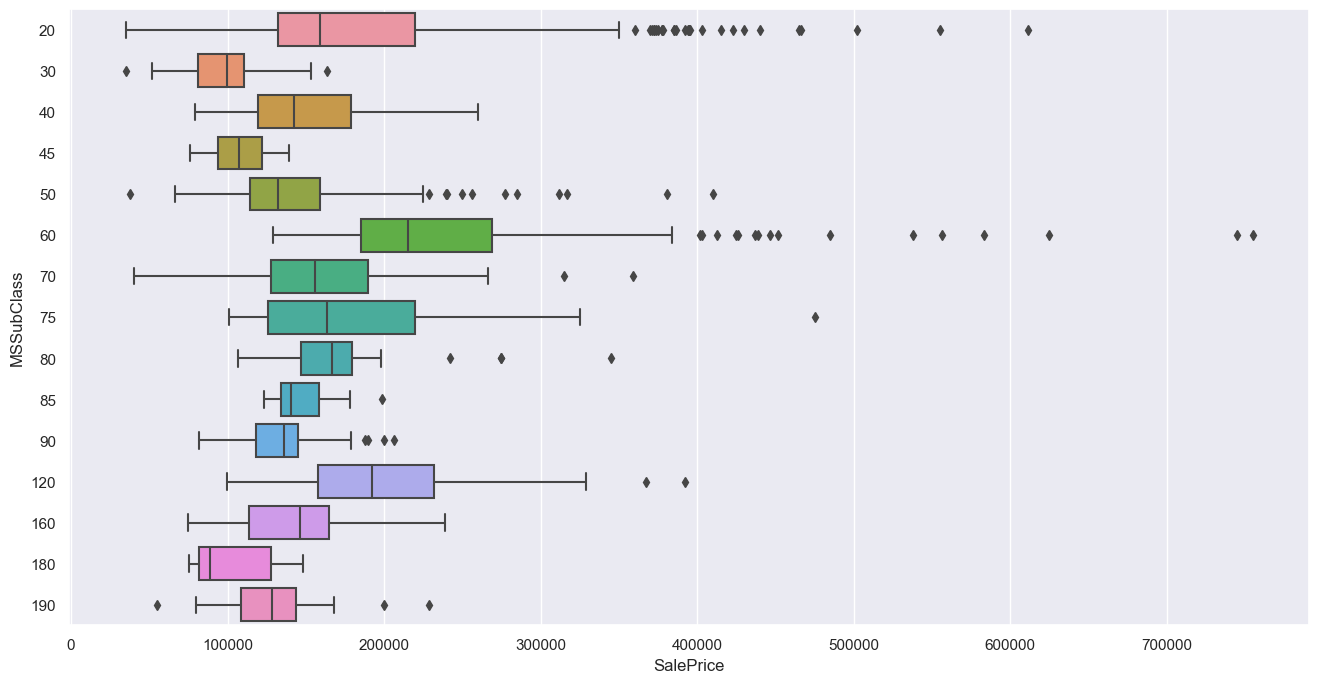

In [67]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = houseData, y = "MSSubClass", x = "SalePrice", orient = "h")

<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

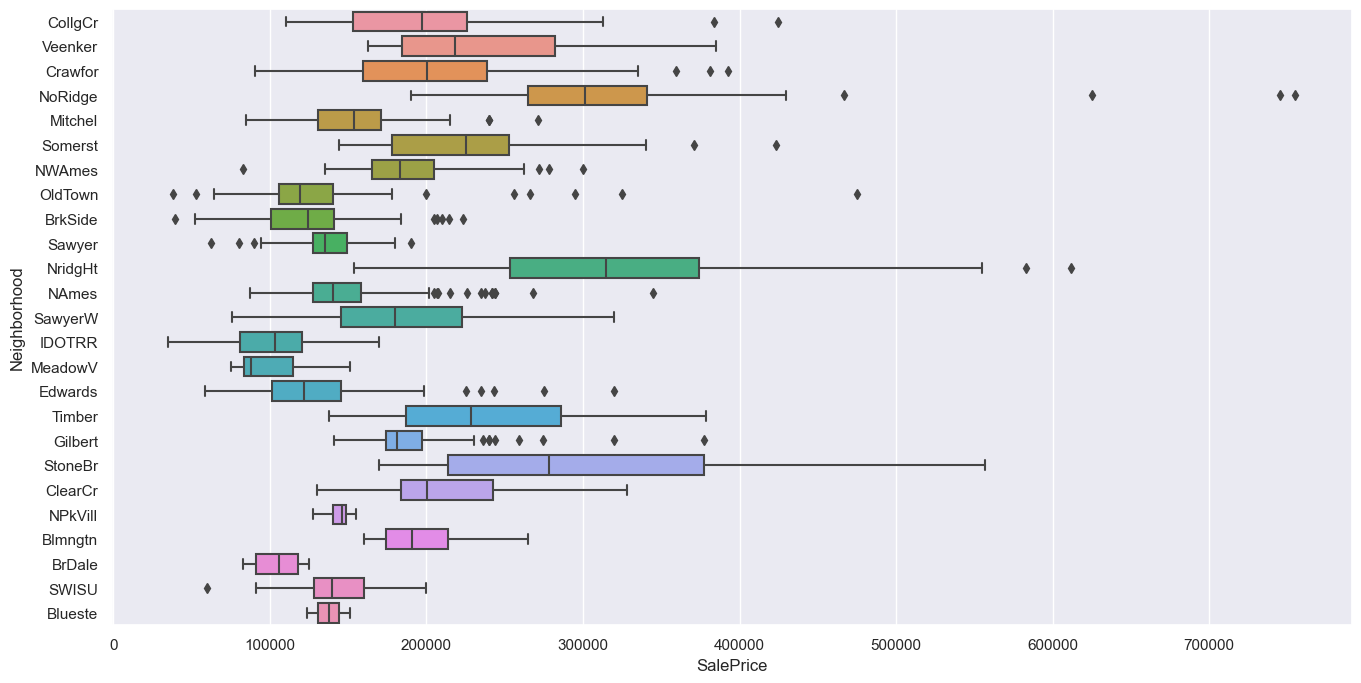

In [68]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = houseData, y = "Neighborhood", x = "SalePrice", orient = "h")

<AxesSubplot:xlabel='SalePrice', ylabel='BldgType'>

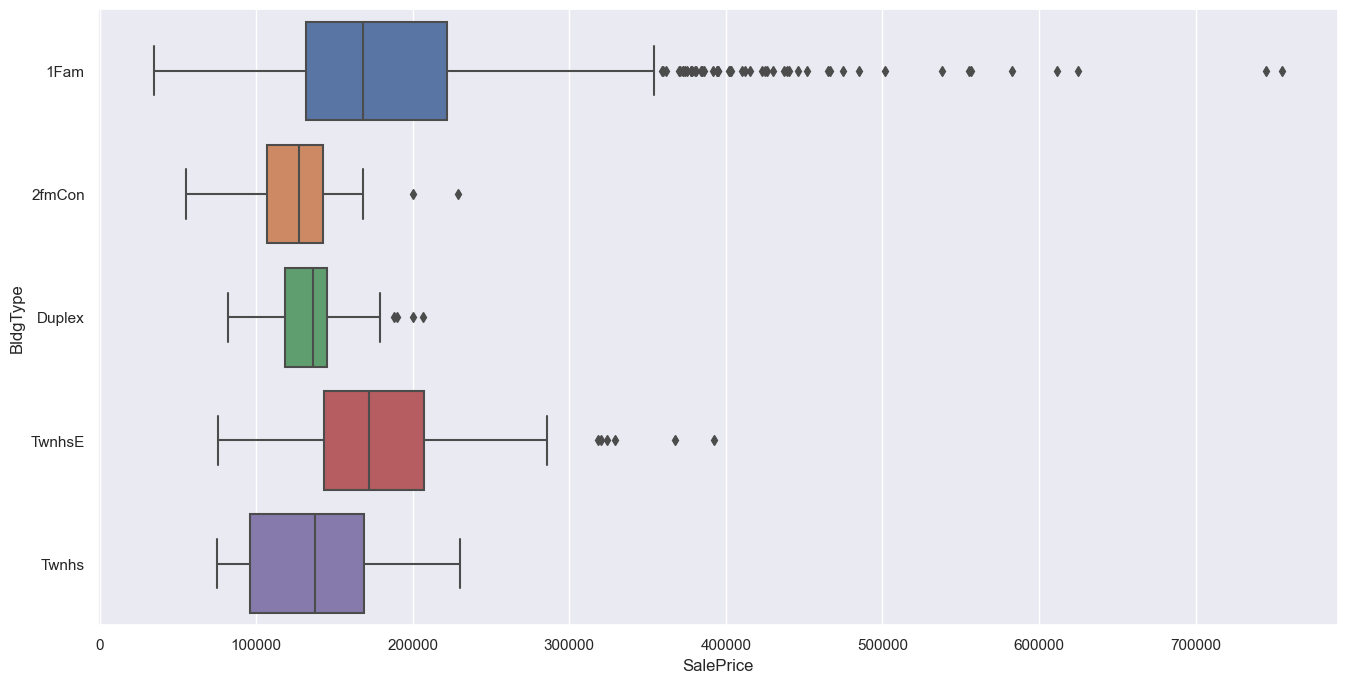

In [69]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = houseData, y = "BldgType", x = "SalePrice", orient = "h")

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

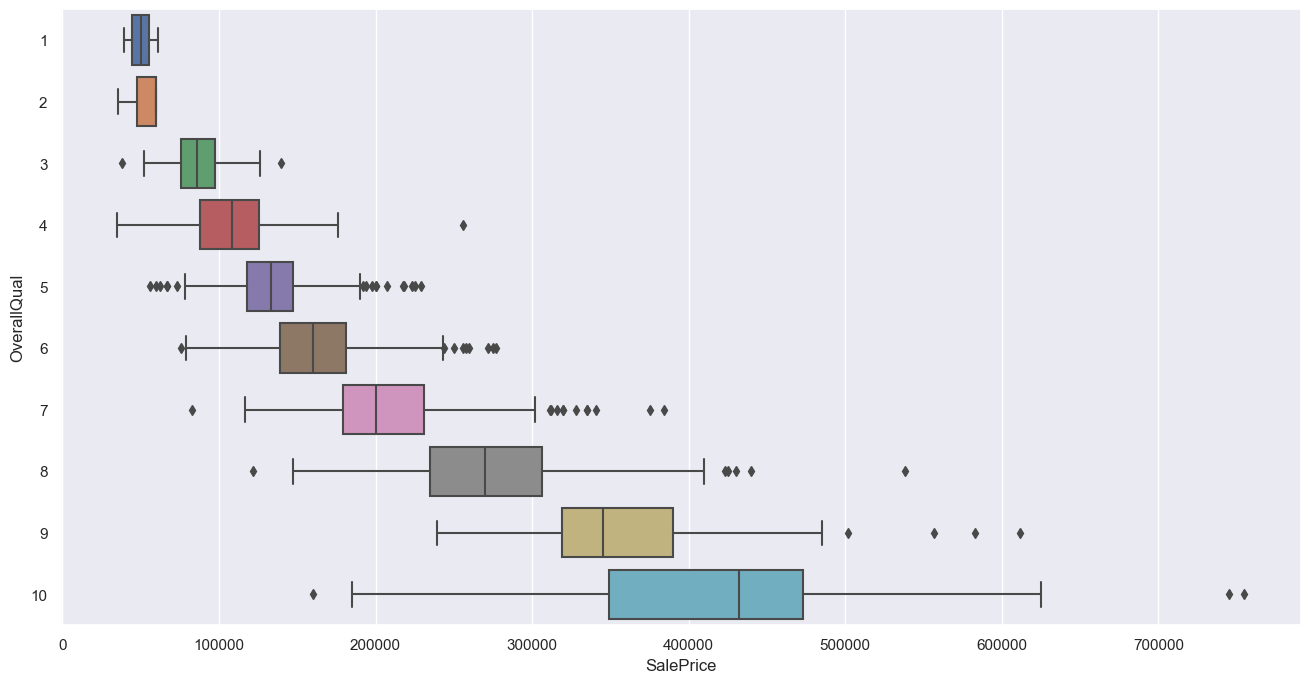

In [70]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = houseData, y = "OverallQual", x = "SalePrice", orient = "h")

>2(a) Clearly, OverallQual and BldgType. As OverallQual increases, SalePrice generally increases. For BldgType 1Fam building type commands a higher price than other building types.

# Problem 3

# 3(a)

<AxesSubplot:xlabel='SalePrice', ylabel='GarageType'>

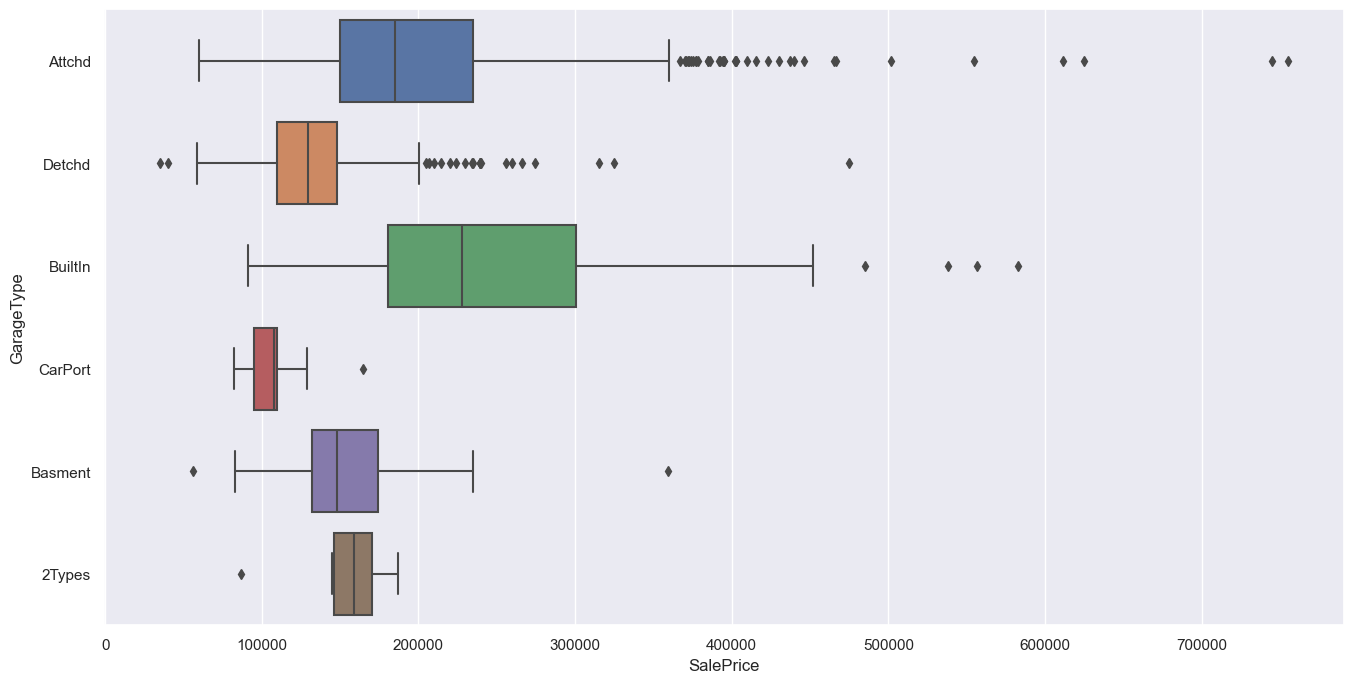

In [152]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = houseData, y = "GarageType", x = "SalePrice", orient = "h")

In [163]:
#Here I am replacing NA with False so it can be seen in the boxplot
df2 = houseData.copy()
df2 = df2.fillna(False)n

<AxesSubplot:xlabel='SalePrice', ylabel='GarageType'>

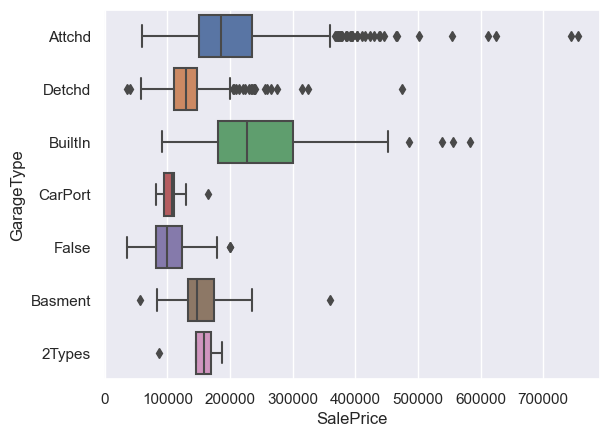

In [166]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = df2, y = "GarageType", x = "SalePrice", orient = "h")

> 3(a) The SalePrice generally gets affected by whether it has a Garage or not. For houses with garage, their price ranges in the lower end of 50k to 200k while for houses with garages their price ranges up to 700k.